In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv("C:\\Users\\ayush\\Downloads\\spam.csv")

In [3]:
df.head(1)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."


In [4]:
df.tail(1)

,Category,Message
5571,ham,Rofl. Its true to its name


In [5]:
import nltk

In [6]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.tokenize import word_tokenize 

In [8]:
df['tokens'] = df['Message'].apply(word_tokenize)

In [9]:
df["tokens"]

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: tokens, Length: 5572, dtype: object

## Stemming

In [10]:
from nltk.stem import PorterStemmer

In [11]:
stemmer = PorterStemmer()
stemmer

<PorterStemmer>

In [12]:
df['stemmed_tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])


In [13]:
df['stemmed_tokens']

0       [go, until, jurong, point, ,, crazi, .., avail...
1                  [ok, lar, ..., joke, wif, u, oni, ...]
2       [free, entri, in, 2, a, wkli, comp, to, win, f...
3       [u, dun, say, so, earli, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goe, to, usf, ,, ...
                              ...                        
5567    [thi, is, the, 2nd, time, we, have, tri, 2, co...
5568          [will, ü, b, go, to, esplanad, fr, home, ?]
5569    [piti, ,, *, wa, in, mood, for, that, ., so, ....
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                    [rofl, ., it, true, to, it, name]
Name: stemmed_tokens, Length: 5572, dtype: object

In [14]:
df.head(1)

,Category,Message,tokens,stemmed_tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazi, .., avail..."


In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
from nltk.stem import WordNetLemmatizer


In [17]:
lemmatizer = WordNetLemmatizer()


In [18]:
df['lemmatized_tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df['lemmatized_tokens']

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, go, to, usf, ,, h...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, wa, in, mood, for, that, ., So, ....
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                   [Rofl, ., Its, true, to, it, name]
Name: lemmatized_tokens, Length: 5572, dtype: object

## Yes! Stopwords removal eliminates common, less meaningful words like “me”, “I”, “and”, “the” to focus on important words.

## stopwords database” is called a stopword list or stopword corpus

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['clean_tokens'] = df['lemmatized_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

print(df[['Message', 'lemmatized_tokens', 'clean_tokens']].head())


                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                   lemmatized_tokens  \
0  [Go, until, jurong, point, ,, crazy, .., Avail...   
1           [Ok, lar, ..., Joking, wif, u, oni, ...]   
2  [Free, entry, in, 2, a, wkly, comp, to, win, F...   
3  [U, dun, say, so, early, hor, ..., U, c, alrea...   
4  [Nah, I, do, n't, think, he, go, to, usf, ,, h...   

                                        clean_tokens  
0  [Go, jurong, point, ,, crazy, .., Available, b...  
1           [Ok, lar, ..., Joking, wif, u, oni, ...]  
2  [Free, entry, 2, wkly, comp, win, FA, Cup, fin...  
3  [U, dun, say, early, hor, ..., U, c, already, ...  
4  [Nah, n't, think, go, usf, ,, life, around, th..

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## The StopWords are:

In [20]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [21]:
print(len(stopwords.words('english')))


198


In [22]:
df['clean_text'] = df['clean_tokens'].apply(lambda tokens: ' '.join(tokens))

print(df[['Message', 'clean_text']].head())


                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          clean_text  
0  Go jurong point , crazy .. Available bugis n g...  
1                    Ok lar ... Joking wif u oni ...  
2  Free entry 2 wkly comp win FA Cup final tkts 2...  
3        U dun say early hor ... U c already say ...  
4          Nah n't think go usf , life around though  


In [23]:
df.head(2)

,Category,Message,tokens,stemmed_tokens,lemmatized_tokens,clean_tokens,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazi, .., avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, jurong, point, ,, crazy, .., Available, b...","Go jurong point , crazy .. Available bugis n g..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]",Ok lar ... Joking wif u oni ...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

print(X.toarray())  # optional: see array
print(vectorizer.get_feature_names_out())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['clean_text'])

print(X_tfidf.toarray())  # optional: see array
print(tfidf.get_feature_names_out())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']


## Naive Bayes classifier 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Category'], test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9713004484304932


## Confusion Matrix

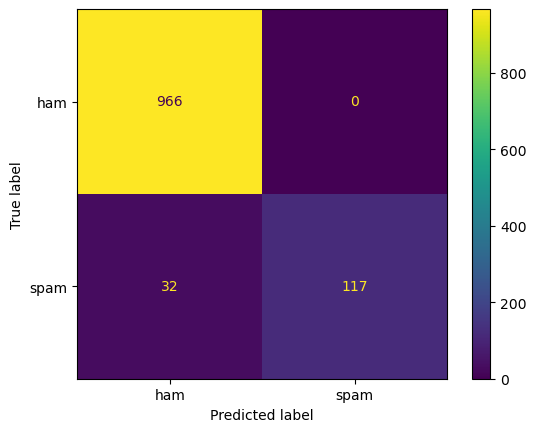

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## LogisticRegression

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       966
        spam       0.99      0.69      0.81       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



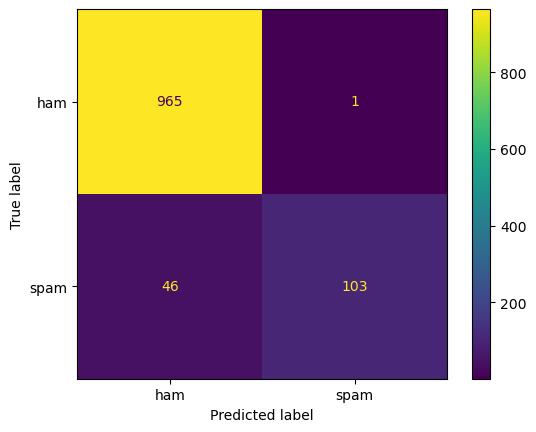

In [29]:
from sklearn.linear_model import LogisticRegression

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot()


## LSTM & RNN

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
X_padded = pad_sequences(sequences, maxlen=100)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df['Category'])

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5


C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9000 - loss: 0.3190 - val_accuracy: 0.9794 - val_loss: 0.0677
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9892 - loss: 0.0441 - val_accuracy: 0.9892 - val_loss: 0.0464
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9940 - loss: 0.0214 - val_accuracy: 0.9874 - val_loss: 0.0460
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9982 - loss: 0.0107 - val_accuracy: 0.9848 - val_loss: 0.0568
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9981 - loss: 0.0088 - val_accuracy: 0.9874 - val_loss: 0.0565


In [31]:
import sys
print(sys.version)



3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [32]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [39]:
num_classes = len(le.classes_)  # Number of categories

# For binary classification:
model.add(Dense(1, activation='sigmoid'))

# For multiclass classification:
# model.add(Dense(num_classes, activation='softmax'))

# Use categorical_crossentropy for multiclass classification:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# If you go for multiclass, ensure y_train and y_test are one-hot encoded:
y_encoded = keras.utils.to_categorical(le.fit_transform(df['Category']), num_classes=num_classes)


In [38]:
import keras

In [37]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Create a checkpoint callback to save the best model
# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# # Fit the model and include the checkpoint callback
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint])


In [40]:
y_encoded

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])